# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

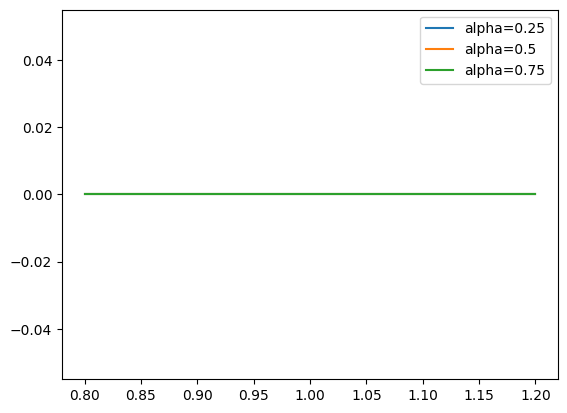

In [39]:
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
import matplotlib.pyplot as plt


model = HouseholdSpecializationModelClass()

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1,5]

for alpha in alpha_values:
    model.par.alpha = alpha
    HM = model.sol.HM_vec
    HF = model.sol.HF_vec
    H = HM**(1-model.par.alpha) * HF**model.par.alpha
    plt.plot(model.par.wF_vec, H, label=f"alpha={alpha}")
plt.legend()
plt.show()



# Question 2

Explain your code and procedure

In [3]:
# code

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.